# LocaleDB: Data Access
---

This notebooks shows examples of access to Covid-19 disease dynamics time series data (specifically daily counts of confirmed cases and deaths reported on US county level) stored in [LocaleDB](https://github.com/momacs/localedb).

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

from localedb.localedb import LocaleDB
from localedb.util import plot_ts

db = LocaleDB().set_disease('COVID-19')

Now that we have a reference to the ``LocaleDB`` object, we begin by retrieving disease dynamics for the Allegheny County, PA:

In [3]:
db.get_dis_dyn_by_id(id=84042003, cols=['n_conf', 'n_dead'], do_interpolate=True, n_diff=0, smooth_window_len=0, do_scale=True).shape

(2, 547)

The shape of ``(2, 547)`` indicates there are two time series (i.e., the daily numbers of confirmed cases and deaths) with each having 547 observations.  Let's plot those time series.

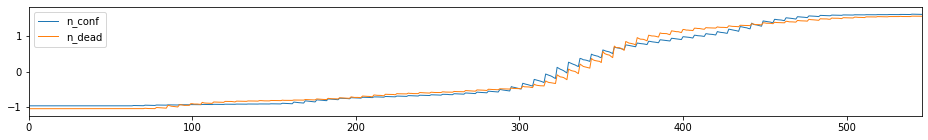

In [4]:
_,_ = plot_ts(db.get_dis_dyn_by_id(id=84042003, cols=['n_conf', 'n_dead'], do_interpolate=True, n_diff=0, smooth_window_len=0, do_scale=True), cols=['n_conf', 'n_dead'])

Let's look at those time series differenced.

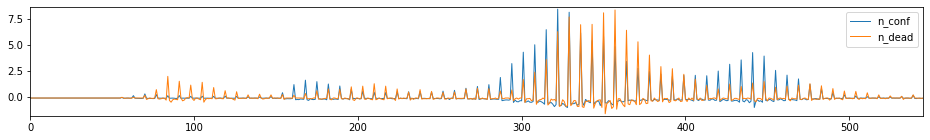

In [5]:
_,_ = plot_ts(db.get_dis_dyn_by_id(id=84042003, cols=['n_conf', 'n_dead'], do_interpolate=True, n_diff=1, smooth_window_len=0, do_scale=True), cols=['n_conf', 'n_dead'])

Let's smooth using two window sizes, two and three weeks long:

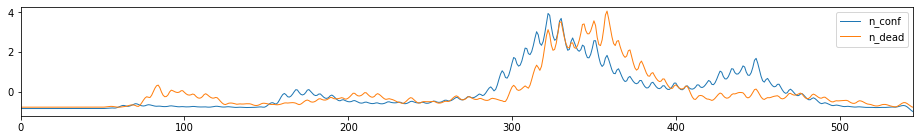

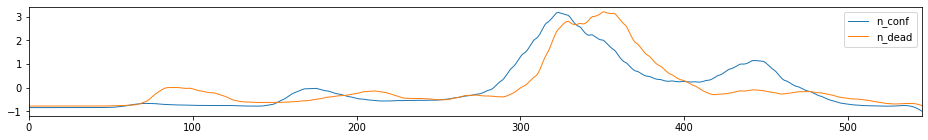

In [6]:
_,_ = plot_ts(db.get_dis_dyn_by_id(id=84042003, cols=['n_conf', 'n_dead'], do_interpolate=True, n_diff=1, smooth_window_len=14, do_scale=True), cols=['n_conf', 'n_dead'])
_,_ = plot_ts(db.get_dis_dyn_by_id(id=84042003, cols=['n_conf', 'n_dead'], do_interpolate=True, n_diff=1, smooth_window_len=28, do_scale=True), cols=['n_conf', 'n_dead'])

Let's retrieve the same disease dynamics but using the US FIPS code which is more realistic because you may not know the ID of the locale you're looking at using:

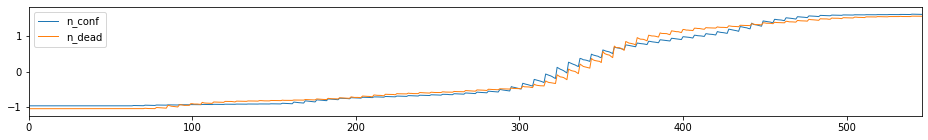

In [7]:
_,_ = plot_ts(db.get_dis_dyn_by_fips(fips='42003', cols=['n_conf', 'n_dead'], do_interpolate=True, n_diff=0, smooth_window_len=0, do_scale=True)[0][0], cols=['n_conf', 'n_dead'])

For a more direct access to the database, let's get populations of all PA counties:

In [8]:
np.array([r[0] for r in db._exec('SELECT pop FROM main.locale WHERE fips LIKE %s ORDER BY fips ASC;', ['42___'])], np.int32)  # population sizes for PA counties

array([ 103009, 1216045,   64735,  163929,   47888,  421164,  121829,
         60323,  628270,  187853,  130192,    4447,   64182,  162385,
        524989,   38438,   79255,   38632,   64964,   84629,  253370,
        278299,  566747,   29910,  269728,  129274,    7247,  155027,
         14530,   36233,   45144,   84073,   43425,   24763,  209674,
        545724,   85512,  141793,  369318,  317417,  113299,   40625,
        109424,   46138,  170271,  830915,   18230,  305285,   90843,
         46272, 1584064,   55809,   16526,  141359,   40372,   73447,
          6066,   40328,   40591,   44923,   50668,   39191,  206865,
         51361,  348899,   26794,  449058], dtype=int32)

We finish with a proper cleanup:

In [9]:
del(db)